# Sklearn
## imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler

 ## load Data

In [ ]:
seed =1234
XDf=  pd.read_csv('banco1.csv',index_col=0)
XDf =XDf.fillna(-9)
XDf.iloc[:,2:19] = XDf.iloc[:,2:19].astype('object')
XDf.sexo[XDf.sexo=='Feminino'] = 0
XDf.sexo[XDf.sexo=='Masculino'] = 1
XDf.sexo = XDf.sexo.astype('int64')
XDf['sexo_miss'] = XDf['sexo']
XDf.sexo_miss[XDf.sexo==-9] = 1
XDf.sexo_miss[XDf.sexo!=-9] = 0
XDf.sexo[XDf.sexo==-9] = 0
XDf['tamanhoCabe_miss'] = XDf['tamanhoCabe']
XDf.tamanhoCabe_miss[XDf.tamanhoCabe==-9] = 1
XDf.tamanhoCabe_miss[XDf.tamanhoCabe!=-9] = 0
XDf.tamanhoCabe[XDf.tamanhoCabe==-9] = 32
XDf.tamanhoCabe = XDf.tamanhoCabe.astype('int64')
XDf.tamanhoCabe_miss = XDf.tamanhoCabe_miss.astype('int64')
classFeto = XDf.classFeto.astype('object')
classFeto_miss = classFeto.copy()
classFeto[classFeto=='Termo'] = 1
classFeto_miss[classFeto_miss!=-9]= 0
classFeto_miss[classFeto_miss==-9] = 1
classFeto[classFeto=='Pré-Termo'] = 0
classFeto[classFeto=='Pós-Termo'] = 2
classFeto[classFeto==-9]=0
XDf.classFeto = classFeto.astype('int64')
XDf['classFeto_miss'] = classFeto_miss.astype('int64')
del classFeto
del classFeto_miss
micro = XDf.micro
micro_miss = micro.copy()
micro[micro==-9] = 0
XDf.micro = micro.astype('int64')
del micro
micro_miss[micro_miss!=-9] =0
micro_miss[micro_miss==-9] = 1
XDf['micro_miss'] = micro_miss.astype('int64')
del micro_miss
del XDf['NV_TC_MICRO']
del XDf['NV_Storch']
del XDf['NV_sifilis']
del XDf['count_storch']
del XDf['NV_TOXO']
del XDf['NV_CMV']
del XDf['NV_DENGUE']
del XDf['NV_CHIK']
del XDf['NV_USG_MICRO']
del XDf['NV_RM_MICRO']
del XDf['NV_USG_RESULT']
del XDf['NV_TC_RESULT']
del XDf['NV_RM_RESULT']
del XDf['missImagem']
XDf=XDf[['sexo','sexo_miss','tamanhoCabe','tamanhoCabe_miss','classFeto','classFeto_miss','micro','micro_miss','casegr']]
YDf = XDf.casegr
del XDf['casegr']
Y = np.array(YDf)

X = np.array(XDf)
Y[Y!='Discarded']=1
Y[Y=='Discarded'] = 0
Y=Y.astype(int)
X2 = MinMaxScaler().fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=seed)
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,Y,test_size=0.2,random_state=seed)

# Classify Group1
## KNeighborsClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

In [8]:
param = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
KNN = KNeighborsClassifier()
grid = GridSearchCV(KNN,param)
grid.fit(x2_train,y2_train)
grid.best_params_

{'n_neighbors': 3}

In [9]:
modelo_KNN = KNeighborsClassifier(n_neighbors=3)
res_KNN = cross_val_score(modelo_KNN,x2_train,y2_train,cv=10)
res_KNN.mean(),res_KNN.std(),res_KNN.min(),res_KNN.max()

(0.77012987012987, 0.09218238375207732, 0.5909090909090909, 0.9090909090909091)

## CART

In [10]:
from sklearn.tree import DecisionTreeClassifier

param = {'max_depth':[None,5,6,7,8,9,10,11,12,13,14,15],'min_samples_split':[15,16,17,18,19,20,21,22,23,24,25,26]}
CART = DecisionTreeClassifier()
grid = GridSearchCV(CART,param)
grid.fit(x2_train,y2_train)
grid.best_params_

{'max_depth': None, 'min_samples_split': 20}

In [11]:
modelo_CART = DecisionTreeClassifier(max_depth=None,min_samples_split=20)
res_CART = cross_val_score(modelo_CART,x2_train,y2_train,cv=10)
res_CART.mean(),res_CART.std(),res_CART.min(),res_CART.max()

(0.8162337662337661,
 0.052579584746793126,
 0.7727272727272727,
 0.9090909090909091)

## Random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [13]:
param ={'min_samples_split':[20,30,40,50,60,100],'max_depth':[None,2,4,5,6,7,8,9,10,15]}
RF = RandomForestClassifier(random_state=seed)
grid = GridSearchCV(RF,param)
grid.fit(x2_train,y2_train)
grid.best_params_

{'max_depth': 5, 'min_samples_split': 40}

In [14]:
modelo_RF = RandomForestClassifier(min_samples_split=40,max_depth=5,random_state=seed)
res_RF = cross_val_score(modelo_RF,x_train,y_train,cv=10)
res_RF.mean(),res_RF.std(),res_RF.min(),res_RF.max()

(0.8344155844155845,
 0.054019400338219295,
 0.7727272727272727,
 0.9090909090909091)

In [15]:
modelo_RF.fit(x_train,y_train)
ypred = modelo_RF.predict(x_test)
res = classification_report(y_test,ypred)

In [16]:
print(res)
ypred = ypred+1
pd.crosstab(ypred,y_test)


              precision    recall  f1-score   support

           0       0.76      0.91      0.83        35
           1       0.77      0.50      0.61        20

    accuracy                           0.76        55
   macro avg       0.77      0.71      0.72        55
weighted avg       0.76      0.76      0.75        55



col_0,0,1
row_0,,
1,32,10
2,3,10


## AdaBoost

In [17]:
from sklearn.ensemble import AdaBoostClassifier

param ={'learning_rate':[0.01,0.05,0.1,0.2,0.5,1,1.5,2]}
Ada = AdaBoostClassifier(random_state=seed)
grid = GridSearchCV(Ada,param)
grid.fit(x2_train,y2_train)
grid.best_params_

{'learning_rate': 0.1}

In [18]:
modelo_Ada = AdaBoostClassifier(learning_rate=0.1,random_state=seed)
res_Ada = cross_val_score(modelo_Ada,x2_train,y2_train,cv=10)
res_Ada.mean(),res_Ada.std(),res_Ada.min(),res_Ada.max()

(0.8164502164502165,
 0.08537472642545062,
 0.6363636363636364,
 0.9047619047619048)

## Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

param = {'max_depth':[2,3,4,5,8,10,15],'min_samples_split':[2,4,5,6,8,10,20,30,40]}
GB = GradientBoostingClassifier(random_state=seed)
grid = GridSearchCV(GB,param)
grid.fit(x2_train,y2_train)
grid.best_params_

{'max_depth': 2, 'min_samples_split': 40}

In [20]:
modelo_GB = GradientBoostingClassifier(max_depth=2,min_samples_split=40,random_state=seed)
res_GB = cross_val_score(modelo_GB,x2_train,y2_train,cv=10)
res_GB.mean(),res_GB.std(),res_GB.min(),res_GB.max()

(0.8164502164502165,
 0.0877614212095292,
 0.6363636363636364,
 0.9090909090909091)

### roc curve

In [21]:
from sklearn.metrics import roc_curve, auc,plot_roc_curve ,classification_report

In [22]:
modelo_RF = RandomForestClassifier(min_samples_split=40,max_depth=5,random_state=seed)
modelo_RF.fit(x2_train,y2_train)
modelo_KNN = KNeighborsClassifier(n_neighbors=3)
modelo_KNN.fit(x2_train,y2_train)
modelo_CART = DecisionTreeClassifier(max_depth=None,min_samples_split=20)
modelo_CART.fit(x2_train,y2_train)
modelo_Ada = AdaBoostClassifier(learning_rate=0.1,random_state=seed)
modelo_Ada.fit(x2_train,y2_train)
modelo_GB = GradientBoostingClassifier(max_depth=2,min_samples_split=40,random_state=seed)
modelo_GB.fit(x2_train,y2_train)

GradientBoostingClassifier(max_depth=2, min_samples_split=40, random_state=1234)

<Figure size 432x288 with 0 Axes>

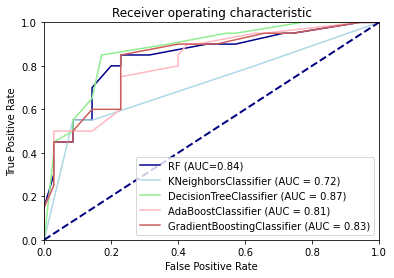

In [23]:
plt.figure()
fig =plot_roc_curve(modelo_RF,x2_test,y2_test,color='darkblue',label="RF (AUC=0.84)")

#fig =plot_roc_curve(modelo_KNN,x2_test,y2_test,color='lightblue',ax=fig.ax_, label="KNN (AUC=0.72)")
fig =plot_roc_curve(modelo_KNN,x2_test,y2_test,color='lightblue',ax=fig.ax_)
fig =plot_roc_curve(modelo_CART,x2_test,y2_test,color='lightgreen',ax=fig.ax_)
fig =plot_roc_curve(modelo_Ada,x2_test,y2_test,color='lightpink',ax=fig.ax_)
fig =plot_roc_curve(modelo_GB,x2_test,y2_test,color='indianred',ax=fig.ax_)
#fig =plot_roc_curve(modelo_CART,x2_test,y2_test,color='lightgreen',ax=fig.ax_, label="CART (AUC=0.87)")
#fig =plot_roc_curve(modelo_Ada,x2_test,y2_test,color='lightpink',ax=fig.ax_, label="AdaBoost (AUC=0.81)")
#fig =plot_roc_curve(modelo_GB,x2_test,y2_test,color='indianred',ax=fig.ax_, label="GB (AUC=0.83)")
lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('fig2',dpi=100)
plt.show()


In [24]:
y2_pred=modelo_RF.predict(x2_test)
print(classification_report(y2_test,y2_pred))
pd.crosstab(y2_test,y2_pred)

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        35
           1       0.77      0.50      0.61        20

    accuracy                           0.76        55
   macro avg       0.77      0.71      0.72        55
weighted avg       0.76      0.76      0.75        55



col_0,0,1
row_0,,
0,32,3
1,10,10


# Classify Group 2
## load data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
from spacy.tokens import Token, Doc
import unidecode
import html
import string
import re
from sklearn.metrics import accuracy_score,precision_score, recall_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import pickle as pk
from sklearn.preprocessing import MinMaxScaler
#import arff

seed =1234
file = open('Xclassific2.dat','rb')
X = pk.load(file)
file.close()
file = open('Yclassific2.dat','rb')
Y = pk.load(file)
file.close()
texto = list(X.texto.copy())
file = open('banco_total.dat','rb')
banco = pk.load(file)
file.close()
X_train, X_test,y_train, y_test = train_test_split(X, Y, train_size=0.8,random_state=seed,stratify=Y)
texto_t = list(X_train.texto.copy())
del X_train['texto']
texto_v = list(X_test.texto.copy())
del X_test['texto']
del X['texto']

## NLP

In [2]:
import NLP as NLP

nlp = NLP.NLP()
lista =nlp.setWordsText(texto_t,2)
X_train =nlp.getDataframe(X_train,texto_t)
X_test = nlp.getDataframe(X_test,texto_v)
lista_total = nlp.setWordsText(texto,2)
X =nlp.getDataframe(X,texto)

#### Save Words list

In [3]:
file = open('lista_word.dat','wb')
pk.dump(lista_total,file)
file.close()

## KNeighborsClassifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

param = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
KNN = KNeighborsClassifier()
grid = GridSearchCV(KNN,param,n_jobs=3)
grid.fit(X_train,y_train)
grid.best_params_

{'n_neighbors': 6}

In [58]:
modelo_KNN = KNeighborsClassifier(n_neighbors=6)
res_KNN = cross_val_score(modelo_KNN,X_train,y_train,cv=10)
res_KNN.mean(),res_KNN.std(),res_KNN.min(),res_KNN.max()

(0.7588483146067417,
 0.03688580383010427,
 0.7078651685393258,
 0.8295454545454546)

## CART

In [22]:
from sklearn.tree import DecisionTreeClassifier

param = {'max_depth':[None,5,6,7,8,9,10,11,12,13,14,15],'min_samples_split':[15,16,17,18,19,20,21,22,23,24,25,26]}
CART = DecisionTreeClassifier()
grid = GridSearchCV(CART,param,n_jobs=3)
grid.fit(X_train,y_train)
grid.best_params_

{'max_depth': 7, 'min_samples_split': 16}

In [23]:
modelo_CART = DecisionTreeClassifier(max_depth=7,min_samples_split=16)
res_CART = cross_val_score(modelo_CART,X_train,y_train,cv=10)
res_CART.mean(),res_CART.std(),res_CART.min(),res_CART.max()

(0.8084014300306434,
 0.04275479455400559,
 0.7303370786516854,
 0.8651685393258427)

## Random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
param ={'min_samples_split':[2,3,4,6,8,10],'max_depth':[None,2,4,5,6,7,8,9,10,15]}
RF = RandomForestClassifier(random_state=seed)
grid = GridSearchCV(RF,param,n_jobs=3)
grid.fit(X_train,y_train)
grid.best_params_

{'max_depth': 15, 'min_samples_split': 2}

In [25]:
modelo_RF = RandomForestClassifier(min_samples_split=2,max_depth=15,random_state=seed)
res_RF = cross_val_score(modelo_RF,X_train,y_train,cv=10,n_jobs=3)
res_RF.mean(),res_RF.std(),res_RF.min(),res_RF.max()

(0.8332482124616956,
 0.02698223549411131,
 0.797752808988764,
 0.8863636363636364)

## AdaBoost

In [26]:
from sklearn.ensemble import AdaBoostClassifier

param ={'learning_rate':[0.01,0.05,0.1,0.2,0.5,1,1.5,2]}
Ada = AdaBoostClassifier(random_state=seed)
grid = GridSearchCV(Ada,param,n_jobs=3)
grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate': 0.2}

In [27]:
modelo_Ada = AdaBoostClassifier(learning_rate=0.2,random_state=seed)
res_Ada = cross_val_score(modelo_Ada,X_train,y_train,cv=10)
res_Ada.mean(),res_Ada.std(),res_Ada.min(),res_Ada.max()

(0.7958886618998979,
 0.023788723767940743,
 0.7613636363636364,
 0.8314606741573034)

## Gradient Boosting

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

param = {'max_depth':[2,3,4,5,8,10,15],'min_samples_split':[2,4,5,6,8,10,20,30,40]}
GB = GradientBoostingClassifier(random_state=seed)
grid = GridSearchCV(GB,param,n_jobs=3)
grid.fit(X_train,y_train)
grid.best_params_

{'max_depth': 8, 'min_samples_split': 40}

In [5]:
modelo_GB = GradientBoostingClassifier(max_depth=8,min_samples_split=40,random_state=seed)
res_GB = cross_val_score(modelo_GB,X_train,y_train,cv=10,n_jobs=3)
res_GB.mean(),res_GB.std(),res_GB.min(),res_GB.max()

(0.8456077630234933,
 0.024842714142666537,
 0.8089887640449438,
 0.8764044943820225)

### Evaluation best model

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_GB = GradientBoostingClassifier(max_depth=8,min_samples_split=40,random_state=seed)
modelo_GB.fit(X_train,y_train)
y_pred =modelo_GB.predict(X_test)


In [8]:
print(classification_report(y_test,y_pred))
pd.crosstab(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       135
           1       0.70      0.53      0.60        40
           2       0.76      0.86      0.81        36
           3       0.56      0.82      0.67        11

    accuracy                           0.83       222
   macro avg       0.73      0.78      0.75       222
weighted avg       0.83      0.83      0.83       222



col_0,0,1,2,3
casegr,,,,
0,123,6,2,4
1,10,21,7,2
2,2,2,31,1
3,0,1,1,9


### Final model

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_GB = GradientBoostingClassifier(max_depth=8,min_samples_split=40,random_state=seed)
modelo_GB.fit(X,Y)


GradientBoostingClassifier(max_depth=8, min_samples_split=40, random_state=1234)

#### Save model

In [10]:
file = open('classific2.dat','wb')
pk.dump(modelo_GB,file)
file.close()

#### Final with all data

In [11]:
y_pred =modelo_GB.predict(X)
banco.loc[banco.typeClass=='group2','classFinal'] =  list(y_pred)
banco.classFinal.replace([0,1,2,3],['Discarded','Somewhat probable','Moderately probable','Highly probable'],inplace=True)
print(classification_report(banco.casegr,banco.classFinal))
pd.crosstab(banco.casegr,banco.classFinal)

                     precision    recall  f1-score   support

           Definite       1.00      1.00      1.00        76
          Discarded       0.97      0.98      0.97       899
    Highly probable       1.00      1.00      1.00        54
Moderately probable       1.00      1.00      1.00       181
  Somewhat probable       0.94      0.89      0.92       291

           accuracy                           0.97      1501
          macro avg       0.98      0.98      0.98      1501
       weighted avg       0.97      0.97      0.97      1501



classFinal,Definite,Discarded,Highly probable,Moderately probable,Somewhat probable
casegr,,,,,
Definite,76,0,0,0,0
Discarded,0,883,0,0,16
Highly probable,0,0,54,0,0
Moderately probable,0,0,0,181,0
Somewhat probable,0,31,0,0,260


## Full Resp 2015

In [12]:
import pandas as pd
import numpy as np
import pickle as pk
from matplotlib import pyplot as plt

file = open("banco_resp_2015",'rb')
banco2015=pk.load(file)
file.close()
file = open("banco_resp_2017",'rb')
banco2017=pk.load(file)
file.close()
#2015 ->30%
#2017 ->31%

In [13]:
banco2015.casegr.value_counts()

DESCARTADO           2322
CONFIRMADO            998
EM INVESTIGAÇÃO       475
SEM CLASSIFICAÇÃO     351
PROVÁVEL               18
Name: casegr, dtype: int64

In [14]:
banco2017.casegr.value_counts()

EM INVESTIGAÇÃO      834
DESCARTADO           351
SEM CLASSIFICAÇÃO    284
CONFIRMADO           160
PROVÁVEL              67
Name: casegr, dtype: int64

In [15]:
banco2015 = banco2015[(banco2015.casegr=='DESCARTADO')|(banco2015.casegr=='CONFIRMADO')]
banco2015.casegr.replace(['DESCARTADO','CONFIRMADO'],['Discarded','Confirmed'],inplace=True)
banco2017 = banco2017[(banco2017.casegr=='DESCARTADO')|(banco2017.casegr=='CONFIRMADO')]
banco2017.casegr.replace(['DESCARTADO','CONFIRMADO'],['Discarded','Confirmed'],inplace=True)
tb = pd.crosstab(banco2015.classFinal,banco2015.casegr)
tb
#x = np.arange(len(classe))
#banco2015['aux'] = banco2015.classFinal
#tb = pd.crosstab(banco2015.aux,banco2015.casegr)
#fig,ax = plt.subplots(figsize=(12, 8))
#b1 =ax.bar(x,tb.iloc[0,[1,3,0,2,4]],width=0.4)
#b2 = ax.bar(x+0.4,tb.iloc[1,[1,3,0,2,4]],width=0.4)

#ax.legend(['confirmado','descartado'])
#ax.set_xticks(x+0.20)
#ax.set_xticklabels(classe)
#plt.plot()
#tb

casegr,Confirmed,Discarded
classFinal,,
Definite,176,1
Discarded,132,1987
Highly probable,77,12
Moderately probable,321,54
Somewhat probable,292,268


In [21]:
tb = pd.crosstab(banco2017.classFinal,banco2017.casegr)
tb

casegr,Confirmed,Discarded
classFinal,,
Definite,24,10
Discarded,37,177
Highly probable,15,19
Moderately probable,31,32
Somewhat probable,53,113


In [33]:
banco2017.casegr.value_counts()

Discarded    2322
Confirmed     998
Name: casegr, dtype: int64

In [23]:
banco2015.casegr.value_counts()

Discarded    2322
Confirmed     998
Name: casegr, dtype: int64